<a href="https://colab.research.google.com/github/akash-baranwal/Image-classification/blob/master/Cat-dog-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "your username"
os.environ['KAGGLE_KEY'] = "your unique key" 
!kaggle datasets download -d biaiscience/dogs-vs-cats

100% 816M/817M [00:08<00:00, 105MB/s] 
100% 817M/817M [00:08<00:00, 95.7MB/s]


In [0]:
!unzip dogs-vs-cats.zip

In [0]:
import fastai
from fastai.vision import *

In [0]:
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

True
True


In [0]:
path='train/train/'

In [0]:
fnames = np.array([f'train/train/{f}' for f in sorted(os.listdir(f'{path}'))])

In [0]:
fnames

array(['train/train/cat.0.jpg', 'train/train/cat.1.jpg', 'train/train/cat.10.jpg', 'train/train/cat.100.jpg', ...,
       'train/train/dog.9996.jpg', 'train/train/dog.9997.jpg', 'train/train/dog.9998.jpg', 'train/train/dog.9999.jpg'],
      dtype='<U25')

In [0]:
tfms=get_transforms()
fnames = np.array([f'train/train/{f}' for f in sorted(os.listdir(f'{path}'))])
def get_labels(file_path): return 'cat' if 'cat' in str(file_path) else 'dog'
data=ImageDataBunch.from_name_func(f'{path}train',label_func=get_labels,fnames=fnames, ds_tfms=tfms, size=224)

In [0]:
data

ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: train/train/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,dog,dog
Path: train/train/train;

Test: None

In [0]:
data.classes

['cat', 'dog']

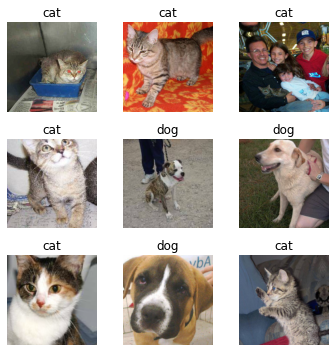

In [0]:
data.show_batch(rows=3,figsize=(5,5))

In [0]:
learn=cnn_learner(data,models.resnet50,metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.085340,0.033238,0.989200,0.010800,04:56
1,0.056019,0.024114,0.991800,0.008200,04:57
2,0.033132,0.018816,0.992800,0.007200,05:11
3,0.021507,0.015543,0.994600,0.005400,05:07


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


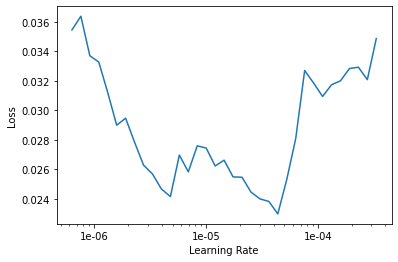

In [0]:
learn.lr_find()
learn.recorder.plot(suggested=True)

In [0]:
learn.fit_one_cycle(2,slice(1e-05,5e-05))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.028101,0.017119,0.993800,0.006200,05:23
1,0.014365,0.014818,0.994200,0.005800,05:27


In [0]:
learn.save('stage-2')
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: train/train/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,dog,dog
Path: train/train/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

[('cat', 'dog', 21), ('dog', 'cat', 8)]

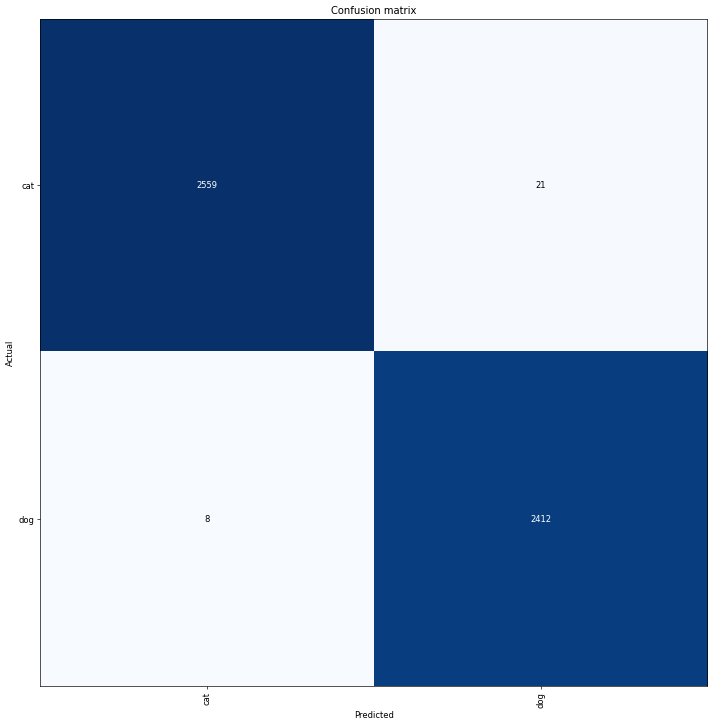

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused()

In [0]:
test=ImageList.from_folder('./test/test')

In [0]:
data.add_test(test)

In [0]:
data

ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: train/train/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,dog,dog
Path: train/train/train;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: train/train/train

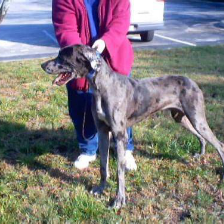

In [0]:
img=data.test_ds[1000][0]
img

In [0]:
learn.predict(img)

(Category dog, tensor(1), tensor([1.7682e-07, 1.0000e+00]))

In [0]:
img=data.test_ds[10000][0]
img
learn.predict(img)

(Category cat, tensor(0), tensor([9.9987e-01, 1.2751e-04]))